# 1. Introduction

# Libraries and Data importation

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import full dataframe
df = pd.read_parquet(r"C:\Users\mirko\Desktop\Curso Data Science DL\EDAHospDischarges_Chile2001-2024\data\processed\Discharges_2001-2024_analysis_finalversionV2.parquet")

# 2. Data Overview

# Shape of the dataset (rows, columns).

In [7]:
df.head()

,sex,age,health insurance,healthcare facility type,healthcare facility name,length of stay,discharge condition,primary diagnosis code,primary diagnosis name,year
0,Male,60-69,Fonasa,Private,Clínica Familia,2,Deceased,C780,tumor maligno secundario del pulmon,2001
1,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",58,Deceased,E145,"diabetes mellitus no especificada, con complic...",2001
2,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",12,Deceased,J189,"neumonia, no especificada",2001
3,Male,1-9,Fonasa,Public,Instituto de Neurocirugía Dr. Alfonso Asenjo,1,Deceased,S065,hemorragia subdural traumatica,2001
4,Male,80-120,Fonasa,Public,Hospital Dr. Leonardo Guzmán (Antofagasta),7,Alive,K830,colangitis,2001


In [8]:
df.shape

(25758741, 10)

# Data dictionary / main variables (categorical, numerical).

In [10]:
# Data type customization really helped to reduce memory usage, increasing speed and capacity to create new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25758741 entries, 0 to 25758740
Data columns (total 10 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   sex                       category
 1   age                       category
 2   health insurance          category
 3   healthcare facility type  category
 4   healthcare facility name  object  
 5   length of stay            int32   
 6   discharge condition       category
 7   primary diagnosis code    object  
 8   primary diagnosis name    object  
 9   year                      int32   
dtypes: category(5), int32(2), object(3)
memory usage: 908.9+ MB


# Missing values / NA treatment summary.

In [12]:
# Dataframe is cleaned from previous steps
df.isna().sum()

sex                         0
age                         0
health insurance            0
healthcare facility type    0
healthcare facility name    0
length of stay              0
discharge condition         0
primary diagnosis code      0
primary diagnosis name      0
year                        0
dtype: int64

The dataframe is completely clean without any missing value. For healthcare facility name the data was missing from 2021 to 2024 and healthcare facility type had around 20% of NaNs, mainly on year 2023. All these values were imputed to "Unknown" to preserve the rest of the data, considering it was not missing at random, so bias could be introduced in case of deletion. The rest of the variables had NaNs and were deleted becasue it did not affected the representativeness of the sample.

# First impressions after cleaning (anything noteworthy?).

It was complex to manage 24 dataframes and explore the data, particulary the missing values and take important decisions to ensure data integrity and accuracy at the same time. There are many duplicates and that is the main uncertainty about the realiability of the information, but it was chosen to just delete duplicates when the patient ID was available, making more evident that some rows were real duplicates. There are many health problems that are highly prevalent and common among specific kind of patients, so it would not be surprising that similar rows are different discharges even if they are completely identical and no ID is available.

# 3. Univariate Analysis

In [17]:
# The analysis will be over all the columns except "year", for which just a line plot will be done to show evolution of discharges over the years
df.columns

Index(['sex', 'age', 'health insurance', 'healthcare facility type',
       'healthcare facility name', 'length of stay', 'discharge condition',
       'primary diagnosis code', 'primary diagnosis name', 'year'],
      dtype='object')

# Categorical variables (7)

# Sex

In [20]:
# Counts
df.sex.value_counts()

sex
Male      13290560
Female    12468181
Name: count, dtype: int64

In [21]:
# Percentage
df.sex.value_counts(normalize = True)*100

sex
Male      51.596311
Female    48.403689
Name: proportion, dtype: float64

In [22]:
# Translate from spanish to english
df["sex"] = df["sex"].cat.rename_categories({"Hombre": "Male", "Mujer": "Female"})

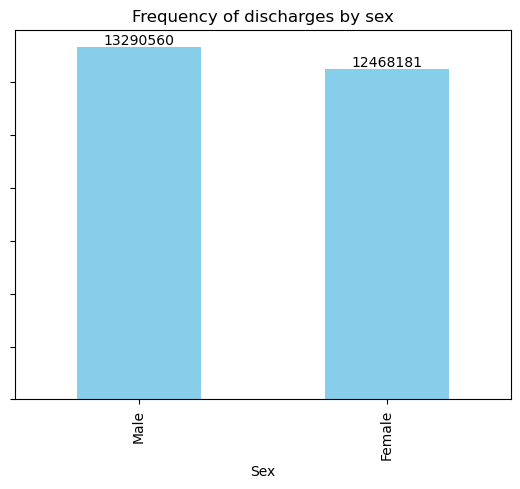

In [23]:
# Get value counts
counts = df['sex'].value_counts()

# Plot bar chart
ax = counts.plot(kind='bar', color='skyblue')

# Add counts on top of each bar
for i, count in enumerate(counts):
    ax.text(i, count + 0.05, str(count), ha='center', va='bottom')

plt.xlabel('Sex')
plt.ylabel(None)
plt.title('Frequency of discharges by sex')
plt.tick_params(labelleft=False)
plt.show()


# Health insurance

In [25]:
# Counts
df["health insurance"].value_counts()

health insurance
Fonasa    20688143
Isapre     5070598
Name: count, dtype: int64

In [26]:
# Percentage
df["health insurance"].value_counts(normalize = True)*100

health insurance
Fonasa    80.315039
Isapre    19.684961
Name: proportion, dtype: float64

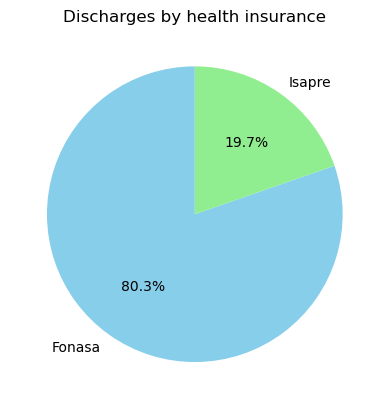

In [27]:
# Get value counts
counts = df['health insurance'].value_counts()

# Plot pie chart with percentages
counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
plt.ylabel('')  # Remove default y-label
plt.title('Discharges by health insurance')
plt.show()


# Healthcare facility type

In [29]:
# Counts
df["healthcare facility type"].value_counts()

healthcare facility type
Public     17489355
Private     7050600
Unknown     1218786
Name: count, dtype: int64

In [30]:
# Percentage
df["healthcare facility type"].value_counts(normalize = True)*100

healthcare facility type
Public     67.896777
Private    27.371679
Unknown     4.731543
Name: proportion, dtype: float64

In [31]:
# See how many facilities are per type
df.groupby("healthcare facility type", observed=False)["healthcare facility name"].nunique()

healthcare facility type
Private    259
Public     217
Unknown      1
Name: healthcare facility name, dtype: int64

In [32]:
# Translate to english
df["healthcare facility type"] = df["healthcare facility type"].cat.rename_categories({"Publico": "Public", "Privado": "Private"})

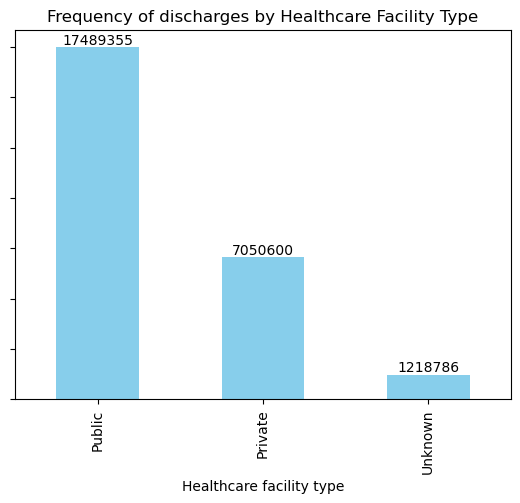

In [33]:
# Get value counts
counts = df['healthcare facility type'].value_counts()

# Plot bar chart
ax = counts.plot(kind='bar', color='skyblue')

# Add counts on top of each bar
for i, count in enumerate(counts):
    ax.text(i, count + 0.05, str(count), ha='center', va='bottom')

plt.xlabel('Healthcare facility type')
plt.ylabel(None)
plt.title('Frequency of discharges by Healthcare Facility Type')
plt.tick_params(labelleft=False)
plt.show()


# Discharge Condition

In [35]:
# Counts
df["discharge condition"].value_counts()

discharge condition
Alive       25029231
Deceased      729510
Name: count, dtype: int64

In [36]:
# Percentage
df["discharge condition"].value_counts(normalize = True)*100

discharge condition
Alive       97.167913
Deceased     2.832087
Name: proportion, dtype: float64

In [37]:
# Translate to english
df["discharge condition"] = df["discharge condition"].cat.rename_categories({"Vivo": "Alive", "Muerto": "Deceased"})

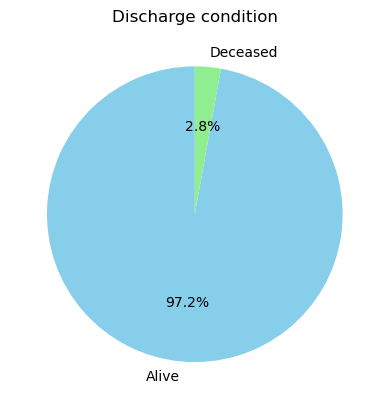

In [38]:
# Get value counts
condition_counts = df['discharge condition'].value_counts()

# Plot pie chart with percentages
condition_counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
plt.ylabel('')  # Remove default y-label
plt.title('Discharge condition')
plt.show()


In [39]:
df.columns

Index(['sex', 'age', 'health insurance', 'healthcare facility type',
       'healthcare facility name', 'length of stay', 'discharge condition',
       'primary diagnosis code', 'primary diagnosis name', 'year'],
      dtype='object')

# Age

In [41]:
#df['age'] = pd.DataFrame(df['age'].tolist()).astype(str).agg('-'.join, axis=1)

In [42]:
# Assuming df['age_range'] is already the string labels "30-39", "40-49", etc.
#age_categories = ["0-1", "1-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-120"]

# Convert to ordered categorical
#df['age'] = pd.Categorical(df['age'], categories=age_categories, ordered=True)

In [43]:
#df.info()

In [44]:
#df.to_parquet("Discharges_2001-2024_analysis_finalversionV2.parquet", index=False)

In [45]:
# Frequency distribution of age ranges
age_counts = df['age'].value_counts().sort_index()
print(age_counts)

age
0-1       2159003
1-9       2127170
10-19     1933405
20-29     2085958
30-39     2658631
40-49     3133982
50-59     3304514
60-69     3400000
70-79     2938127
80-120    2017951
Name: count, dtype: int64


In [46]:
# Age range percents
percentages = age_counts / age_counts.sum() * 100
print(percentages)


age
0-1        8.381632
1-9        8.258051
10-19      7.505821
20-29      8.098059
30-39     10.321277
40-49     12.166674
50-59     12.828709
60-69     13.199403
70-79     11.406330
80-120     7.834044
Name: count, dtype: float64


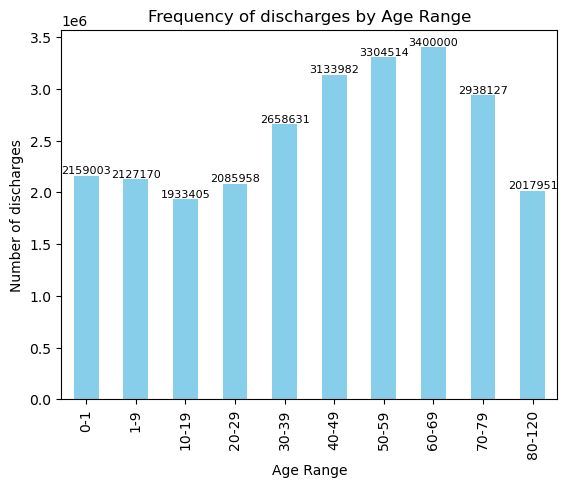

In [47]:
ax = age_counts.plot(kind="bar", color="skyblue")

# Add counts on bars
for i, count in enumerate(age_counts):
    ax.text(i, count + 0.05, str(count), fontsize = 8, ha="center", va="bottom")

plt.xlabel("Age Range")
plt.ylabel("Number of discharges")
plt.title("Frequency of discharges by Age Range")
plt.show()


# Healthcare Facility Name

In [49]:
# Just consider known gealthcare facility names. This mean discharges rom year 2021 to 2024 are excluded from the univariate analysis
hospital_names_20012020 = df['healthcare facility name'][df['healthcare facility name']!= "Unknown"]

In [50]:
hospital_names_20012020

0                                        Clínica Familia 
1           Hospital Del Salvador (Santiago, Providencia)
2           Hospital Del Salvador (Santiago, Providencia)
3            Instituto de Neurocirugía Dr. Alfonso Asenjo
4              Hospital Dr. Leonardo Guzmán (Antofagasta)
                                ...                      
20788758                              Clínica Las Condes 
20788759                                 Clínica Alemana 
20788760                                 Clínica Alemana 
20788761                 Hospital Base San José de Osorno
20788762                 Hospital Base San José de Osorno
Name: healthcare facility name, Length: 20788763, dtype: object

In [51]:
# Just take top 15 facilities with more discharges
hospital_counts_top15 = hospital_names_20012020.value_counts().head(15)
print(hospital_counts_top15)

healthcare facility name
Complejo Hospitalario Dr. Sótero del Río (Santiago, Puente Alto)        545983
Hospital Clínico Regional Dr. Guillermo Grant Benavente (Concepción)    534799
Hospital Dr. Hernán Henríquez Aravena (Temuco)                          421631
Hospital Barros Luco Trudeau (Santiago, San Miguel)                     388789
Clínica Dávila                                                          375298
Hospital Carlos Van Buren (Valparaíso)                                  365457
Hospital Clínico Universidad de Chile                                   347567
Clínica Alemana                                                         347469
Hospital Clínico San Borja-Arriarán (Santiago, Santiago)                340760
Hospital Clínico Universidad Católica                                   334588
Hospital Dr. Gustavo Fricke (Viña del Mar)                              325660
Clínica Santa María                                                     321470
Complejo Asistencial Dr. Ví

In [52]:
# Total amount of discharges among the top 15
print(hospital_counts_top15.sum())

5599537


In [53]:
# Amount of discharges among the bottom 15
hospital_counts_tail15 = hospital_names_20012020.value_counts().tail(15).sum()
print(hospital_counts_tail15)

94


In [54]:
# Percent of discharges adding up the top 15 facilities
hospital_pct = (hospital_counts_top15.sum() / hospital_names_20012020.value_counts().sum()) * 100
print(hospital_pct)

26.935402553773883


In [55]:
# Top 15 hospitals account for 27% of discharges, while the remaining hospitals (“Other”) represent 73% of total discharges. (See visualiztion below)

C:\Users\mirko\AppData\Local\Temp\ipykernel_1520\1368786341.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = df.groupby(['hospital_grouped', 'healthcare facility type']).size().unstack(fill_value=0)
C:\Users\mirko\AppData\Local\Temp\ipykernel_1520\1368786341.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, total + 5, f'{plot_percent[i]:.1f}%', ha='center', va='bottom', fontsize=10)


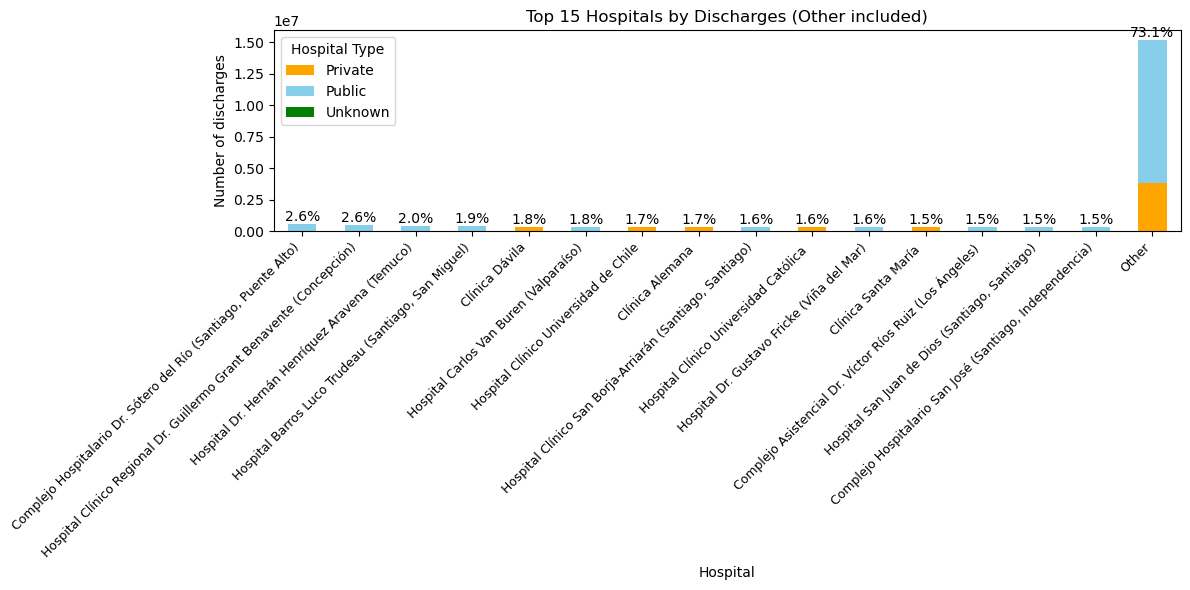

In [56]:
# Compute hospital counts
hospital_counts = hospital_names_20012020.value_counts()

# Identify top 15 hospitals
top_hospitals = hospital_counts.head(15).index.tolist()

# Create a new column for plotting: keep top 15, collapse rest into 'Other'
df['hospital_grouped'] = hospital_names_20012020.where(hospital_names_20012020.isin(top_hospitals), 'Other')


# Group by hospital_grouped and hospital type
plot_data = df.groupby(['hospital_grouped', 'healthcare facility type']).size().unstack(fill_value=0)

# Compute percentages
plot_percent = plot_data / plot_data.sum() * 100

# Plot stacked bar chart
# Keep the order: top 15 + Other
order = top_hospitals + ['Other']
order = [x for x in order if x in plot_data.index]  # ensure no duplicates
plot_data = plot_data.loc[order]

# Define colors for hospital types
colors = []
for col in plot_data.columns:
    if col == 'Public':
        colors.append('skyblue')
    elif col == 'Private':
        colors.append('orange')
    elif col == 'Unknown':
        colors.append('green')  # Unknown in green
    else:
        colors.append('lightgrey')  # fallback color

# Plot stacked bar chart with these colors
ax = plot_data.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)
plt.ylabel('Number of discharges')
plt.xlabel('Hospital')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.title('Top 15 Hospitals by Discharges (Other included)')
plt.legend(title='Hospital Type')

# Compute totals per hospital (sum across hospital types if stacked)
totals = plot_data.sum(axis=1)

# Recompute percentages
plot_percent = totals / totals.sum() * 100

# Annotate percentages on top of bars
for i, total in enumerate(totals):
    ax.text(i, total + 5, f'{plot_percent[i]:.1f}%', ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()

In [57]:
# Drop column created to plot
df.drop(columns = ["hospital_grouped"], inplace = True)

# Primary diagnosis code/name

In [59]:
# Counts of top 15 most frequent diagnoses
names_counts_top15 = df["primary diagnosis name"].value_counts().head(15)
print(names_counts_top15)

primary diagnosis name
neumonia, no especificada                                                    631123
calculo de la vesicula biliar sin colecistitis                               518228
otras apendicitis agudas y las no especificadas                              373913
hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena    314854
infeccion de vias urinarias, sitio no especificado                           291738
apendicitis aguda no especificada                                            254029
nefritis tubulointersticial aguda                                            236153
leiomioma del utero, sin otra especificacion                                 218079
colecistitis aguda                                                           215681
hiperplasia de la prostata                                                   197082
ictericia neonatal, no especificada                                          196611
prepucio redundante, fimosis y parafimosis           

In [60]:
# The top 15 added up to 4.113.924 discharges
print(names_counts_top15.sum())

4113924


In [61]:
# The 15 least frequent diangoses have just 1 discharge each (15 in total)
names_counts_tail15 = df["primary diagnosis name"].value_counts().tail(15).sum()
print(names_counts_tail15)

15


In [62]:
# The top 15 diagnoses contribute to the 15.97% of the discharges from 2001 to 2024
percent_contribution_top15 = (names_counts_top15.sum()/df["primary diagnosis name"].value_counts().sum())*100
print(percent_contribution_top15)

15.970982432720604


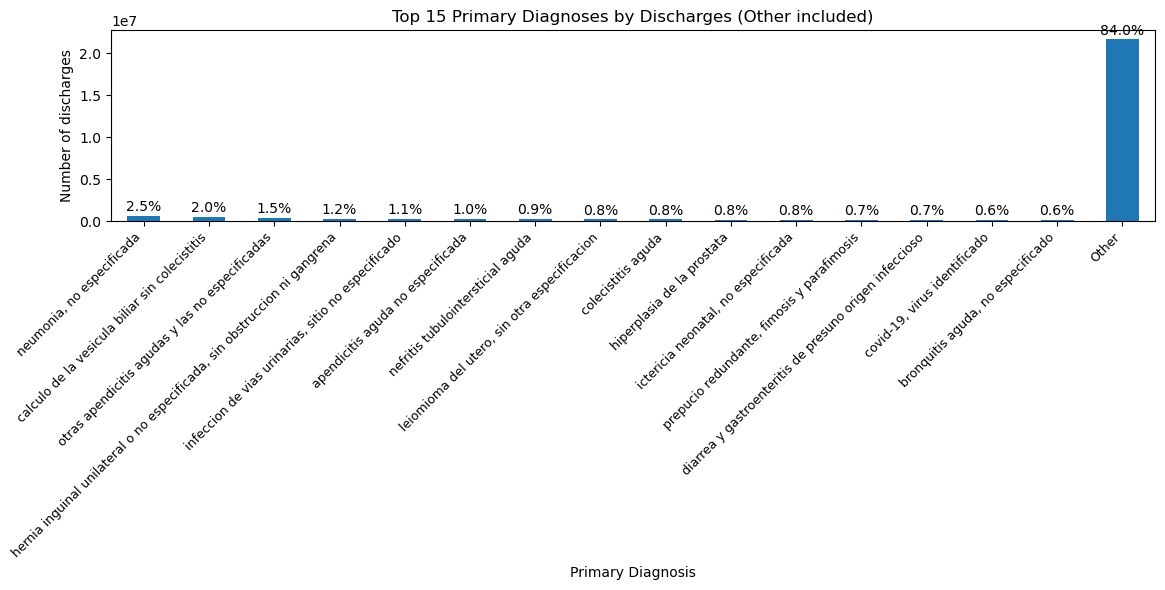

In [63]:
# Plot hostogram with the top 15 most frequent diagnoses. The rest are grouped in "others"

# --- Step 1: Count top 15 diagnoses ---
diag_counts = df["primary diagnosis name"].value_counts()
top_diagnoses = diag_counts.head(15).index.tolist()

# --- Step 2: Create grouped column (Top 15 + "Other") ---
df["diagnosis_grouped"] = df["primary diagnosis name"].where(
    df["primary diagnosis name"].isin(top_diagnoses),
    "Other"
)

# --- Step 3: Aggregate counts by diagnosis ---
counts = df["diagnosis_grouped"].value_counts().loc[top_diagnoses + ["Other"]]

# --- Step 4: Compute percentages for labels ---
percentages = counts / counts.sum() * 100

# --- Step 5: Plot bar chart with frequencies on Y ---
ax = counts.plot(kind="bar", figsize=(12, 6))

plt.ylabel("Number of discharges")
plt.xlabel("Primary Diagnosis")
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.title("Top 15 Primary Diagnoses by Discharges (Other included)")

# --- Step 6: Annotate bars with percentages ---
for i, (count, pct) in enumerate(zip(counts, percentages)):
    ax.text(i, count + (0.01 * counts.max()), f"{pct:.1f}%", 
            ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()



In [64]:
# drop column used to plot histogram, to keep dataframe clean and light
df.drop(columns = ["diagnosis_grouped"], inplace = True)

In [65]:
# --- Step 1: Extract first letter from diagnosis code ---
# Assuming you have a column with codes, e.g. df["primary diagnosis code"]
#df["diagnosis_group_letter"] = df["primary diagnosis code"].str[0]

# --- Step 2: Quick check of counts per group ---
#group_counts = df["diagnosis_group_letter"].value_counts()

#print(group_counts)


In [66]:
# This is a list of the chapter codes, manually extracted from the government excel file containing the information about the raw dataframes
cap_codes = ["A00-B99","C00-D48","D50-D89","E00-E90","F00-F99","G00-G99","H00-H59","H60-H95","I00-I99","J00-J99","K00-K93","L00-L99","M00-M99","N00-N99",
"P00-P96","Q00-Q99","R00-R99","S00-T98","V01-Y98","Z00-Z99","U00-U99"]

# Test looping logic 

In [67]:
# Based on first letter and two first numbers is possible to determine to which chapter code the diangosis code belongs
c="X846"
for code in cap_codes:
    if code == "V01-Y98":
        if (c[0] == "W" or c[0] == "X"):
            c= code
            print(c)
        elif (c[0] == code[0] or c[0] == code[4]) and (int(code[1:3]) <= int(c[1:3]) <= int(code[5:7])):
            c = code
            print(c)
            
            
    elif (c[0] == code[0] or c[0] == code[4]) and (int(code[1:3]) <= int(c[1:3]) <= int(code[5:7])):
        c = code
        print(c)

V01-Y98


# Escalating looping logic to a sample of the dataframe

# Vectorization

In [69]:
# Create temporary column with the first letter of each code and turn it to upper case to avoid conflicts with case differences
df["first letter"] = df["primary diagnosis code"].str[0].str.upper()

In [70]:
# Create temporary column with first 2 digits of each code and convert them to integer
df["two digits"] = df["primary diagnosis code"].str[1:3].astype(int)

In [71]:
# Create empty column to fill with chapter codes
df["chapter codes"] = None

In [72]:
# Loop over each chapter code from the list, splitting each one in 2 separated codes to be used to compare with diangosis codes.
# After that, take the first letter and the 2 first numbers of each
for code in cap_codes:
    l = code.split("-")
    start = l[0]
    s_letter = start[0]
    s_number = start[1:3]
    end = l[1]
    e_letter = end[0]
    e_number = end[1:3]

# Create conditions over special cases where the chapter code includes diagnosis codes that can start with 2 different letters
# The mask check for conditions in a vectorized way and if true, the chapter code is assigned to the new column in the corresponding row to the 
    
    if code == "V01-Y98":
        mask = (df["first letter"].isin(["V","W","X","Y"])) & (df["two digits"] <=99)
        df.loc[mask, "chapter codes"] = code
        continue
    if code == "C00-D48":
        mask = ((df["first letter"] == "C") | (df["first letter"] == "D")) & (df["two digits"] <= 99)
        df.loc[mask, "chapter codes"] = code
        continue
    if code == "S00-T98":
        mask = ((df["first letter"]== "S") | (df["first letter"] == "T")) & (df["two digits"] <= 99)
        df.loc[mask, "chapter codes"] = code
        continue
        
# Mask for the general case
    # Mask replaces row by row "if"
    mask = ((df["first letter"] == s_letter) | (df["first letter"] == e_letter)) & (df["two digits"].between(int(s_number), int(e_number)))
    df.loc[mask, "chapter codes"] = code

In [73]:
# Checking if the new column was filled correctly
df.head(5)

,sex,age,health insurance,healthcare facility type,healthcare facility name,length of stay,discharge condition,primary diagnosis code,primary diagnosis name,year,first letter,two digits,chapter codes
0,Male,60-69,Fonasa,Private,Clínica Familia,2,Deceased,C780,tumor maligno secundario del pulmon,2001,C,78,C00-D48
1,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",58,Deceased,E145,"diabetes mellitus no especificada, con complic...",2001,E,14,E00-E90
2,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",12,Deceased,J189,"neumonia, no especificada",2001,J,18,J00-J99
3,Male,1-9,Fonasa,Public,Instituto de Neurocirugía Dr. Alfonso Asenjo,1,Deceased,S065,hemorragia subdural traumatica,2001,S,6,S00-T98
4,Male,80-120,Fonasa,Public,Hospital Dr. Leonardo Guzmán (Antofagasta),7,Alive,K830,colangitis,2001,K,83,K00-K93


In [74]:
# The vectorization was succesfull as all the values are valid, even for special cases
df[df["chapter codes"].isna()]

,sex,age,health insurance,healthcare facility type,healthcare facility name,length of stay,discharge condition,primary diagnosis code,primary diagnosis name,year,first letter,two digits,chapter codes


In [75]:
# Special cases checked: "C" with two digits >48, first letter "S" with two digits >98, "W" or "X" for V01-Y98
df[(df["first letter"] == "S") & (df["two digits"] > 98)]

,sex,age,health insurance,healthcare facility type,healthcare facility name,length of stay,discharge condition,primary diagnosis code,primary diagnosis name,year,first letter,two digits,chapter codes
16076,Male,20-29,Fonasa,Public,Hospital San Francisco (Llaillay),5,Alive,S997,traumatismos multiples del pie y del tobillo,2001,S,99,S00-T98
31318,Male,50-59,Fonasa,Private,Hospital Mutual de Seguridad CChC Los Ángeles,4,Alive,S999,"traumatismo del pie y del tobillo, no especifi...",2001,S,99,S00-T98
31392,Male,50-59,Fonasa,Private,Hospital Mutual de Seguridad CChC Los Ángeles,4,Alive,S999,"traumatismo del pie y del tobillo, no especifi...",2001,S,99,S00-T98
35586,Male,20-29,Fonasa,Private,Hospital Mutual de Seguridad CChC Los Ángeles,14,Alive,S999,"traumatismo del pie y del tobillo, no especifi...",2001,S,99,S00-T98
38310,Male,30-39,Fonasa,Private,Hospital Mutual de Seguridad CChC Los Ángeles,2,Alive,S999,"traumatismo del pie y del tobillo, no especifi...",2001,S,99,S00-T98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25665947,Female,40-49,Isapre,Private,Unknown,1,Alive,S998,"otros traumatismos del pie y del tobillo, espe...",2024,S,99,S00-T98
25711985,Female,80-120,Fonasa,Private,Unknown,1,Alive,S999,"traumatismo del pie y del tobillo, no especifi...",2024,S,99,S00-T98
25717610,Male,40-49,Isapre,Private,Unknown,1,Alive,S998,"otros traumatismos del pie y del tobillo, espe...",2024,S,99,S00-T98
25718028,Male,70-79,Isapre,Private,Unknown,2,Alive,S998,"otros traumatismos del pie y del tobillo, espe...",2024,S,99,S00-T98


In [76]:
df[(df["first letter"] == "D") & (df["two digits"] < 48)]

,sex,age,health insurance,healthcare facility type,healthcare facility name,length of stay,discharge condition,primary diagnosis code,primary diagnosis name,year,first letter,two digits,chapter codes
125,Male,80-120,Fonasa,Public,Hospital de Til Til,3,Deceased,D099,"carcinoma in situ, sitio no especificado",2001,D,9,C00-D48
369,Male,30-39,Fonasa,Public,Instituto de Neurocirugía Dr. Alfonso Asenjo,4,Deceased,D430,tumor de comportamiento incierto o desconocido...,2001,D,43,C00-D48
394,Male,60-69,Fonasa,Public,Hospital de Maullín,3,Deceased,D381,tumor de comportamiento incierto o desconocido...,2001,D,38,C00-D48
644,Male,50-59,Fonasa,Public,Hospital Dr. Leonardo Guzmán (Antofagasta),1,Deceased,D331,"tumor benigno del encefalo, infratentorial",2001,D,33,C00-D48
702,Male,10-19,Fonasa,Public,Hospital Dr. Juan Noé Crevanni (Arica),10,Alive,D430,tumor de comportamiento incierto o desconocido...,2001,D,43,C00-D48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25758397,Female,70-79,Isapre,Private,Unknown,1,Alive,D047,carcinoma in situ de la piel del miembro infer...,2024,D,4,C00-D48
25758424,Female,70-79,Isapre,Private,Unknown,2,Alive,D259,"leiomioma del utero, sin otra especificacion",2024,D,25,C00-D48
25758429,Female,70-79,Isapre,Private,Unknown,2,Alive,D320,tumor benigno de las meninges cerebrales,2024,D,32,C00-D48
25758469,Female,70-79,Isapre,Private,Unknown,8,Alive,D320,tumor benigno de las meninges cerebrales,2024,D,32,C00-D48


# Map chapter names

In [78]:
# I manually filled the dictionary, pairing each chapter code with its corresponding chapter name extracted from the misnisrty of health excel
# with information about the data
cap_names = {"A00-B99": "Ciertas enfermedades infecciosas y parasitarias","C00-D48": "Tumores [Neoplasias]",
             "D50-D89" : "Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad ",
             "E00-E90" : "Enfermedades endocrinas, nutricionales y metabólicas","F00-F99" : "Trastornos mentales y del comportamiento",
             "G00-G99" : "Enfermedades del sistema nervioso central","H00-H59" : "Enfermedades del ojo y sus anexos ",
             "H60-H95" : "Enfermedades del oído y de la apófisis mastoides","I00-I99" : "Enfermedades del sistema circulatorio",
             "J00-J99" : "Enfermedades del sistema respiratorio","K00-K93" : "Enfermedades del sistema digestivo",
             "L00-L99" : "Enfermedades de la piel y del tejido subcutáneo","M00-M99" : "Enfermedades del sistema osteomuscular y del tejido conjuntivo",
             "N00-N99" : "Enfermedades del sistema genitourinario","P00-P96" : "Ciertas afecciones originadas en el período perinatal",
             "Q00-Q99" : "Malformaciones congénitas, deformidades y anomalías cromosómicas",
             "R00-R99" : "Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte",
             "S00-T98" : "Traumatismos, envenenamientos y algunas otras consecuencias de causas externas",
             "V01-Y98" : "Causas externas de morbilidad y de mortalidad",
             "Z00-Z99" : "Factores que influyen en el estado de salud y contacto con los  servicios de salud","U00-U99" : "Códigos para propósitos especiales"}

In [79]:
# Vectorization mapping each chapter name with the corresponding chapter code and creating a column resulting from it
df["chapter names"] = df["chapter codes"].map(cap_names)

In [241]:
# Drop transitory columns to keep dataframe clean
df.drop(columns = ["first letter", "two digits"])

,sex,age,health insurance,healthcare facility type,healthcare facility name,length of stay,discharge condition,primary diagnosis code,primary diagnosis name,year,chapter codes,chapter names,LOS_capped
0,Male,60-69,Fonasa,Private,Clínica Familia,2,Deceased,C780,tumor maligno secundario del pulmon,2001,C00-D48,Tumores [Neoplasias],2
1,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",58,Deceased,E145,"diabetes mellitus no especificada, con complic...",2001,E00-E90,"Enfermedades endocrinas, nutricionales y metab...",58
2,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",12,Deceased,J189,"neumonia, no especificada",2001,J00-J99,Enfermedades del sistema respiratorio,12
3,Male,1-9,Fonasa,Public,Instituto de Neurocirugía Dr. Alfonso Asenjo,1,Deceased,S065,hemorragia subdural traumatica,2001,S00-T98,"Traumatismos, envenenamientos y algunas otras ...",1
4,Male,80-120,Fonasa,Public,Hospital Dr. Leonardo Guzmán (Antofagasta),7,Alive,K830,colangitis,2001,K00-K93,Enfermedades del sistema digestivo,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25758736,Female,70-79,Isapre,Public,Unknown,5,Alive,S525,fractura de la epifisis inferior del radio,2024,S00-T98,"Traumatismos, envenenamientos y algunas otras ...",5
25758737,Female,80-120,Isapre,Public,Unknown,9,Alive,K805,calculo de conducto biliar sin colangitis ni c...,2024,K00-K93,Enfermedades del sistema digestivo,9
25758738,Female,80-120,Isapre,Public,Unknown,7,Alive,M169,"coxartrosis, no especificada",2024,M00-M99,Enfermedades del sistema osteomuscular y del t...,7
25758739,Female,80-120,Isapre,Public,Unknown,9,Deceased,I489,"fibrilacion y aleteo auricular, no especificado",2024,I00-I99,Enfermedades del sistema circulatorio,9


# Plot distribution of diagnoses by chapter names

In [252]:
# Top 5 chapter names concentrate 15.405.886 discharges (59.8%)
df["chapter names"].value_counts().head(5).sum()

15405886

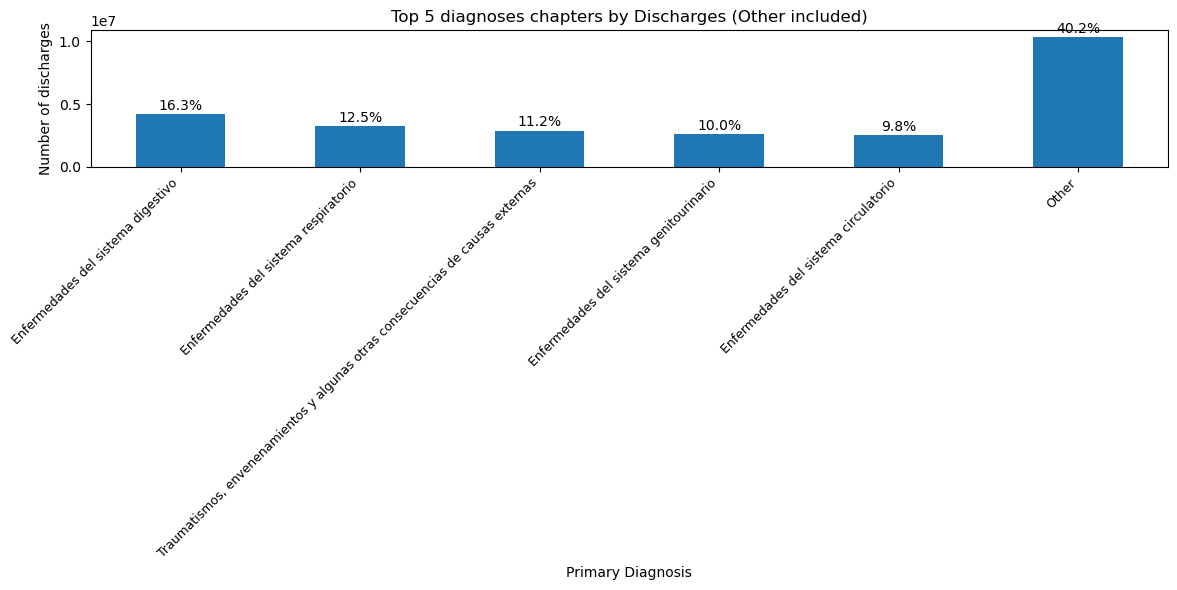

In [248]:
# --- Step 1: Count top 5 diagnoses ---
diag_counts = df["chapter names"].value_counts()
top_diagnoses = diag_counts.head(5).index.tolist()

# --- Step 2: Create grouped column (Top 5 + "Other") ---
df["diagnosis_grouped"] = df["chapter names"].where(
    df["chapter names"].isin(top_diagnoses),
    "Other"
)

# --- Step 3: Aggregate counts by diagnosis ---
counts = df["diagnosis_grouped"].value_counts().loc[top_diagnoses + ["Other"]]

# --- Step 4: Compute percentages for labels ---
percentages = counts / counts.sum() * 100

# --- Step 5: Plot bar chart with frequencies on Y ---
ax = counts.plot(kind="bar", figsize=(12, 6))

plt.ylabel("Number of discharges")
plt.xlabel("Primary Diagnosis")
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.title("Top 5 diagnoses chapters by Discharges (Other included)")

# --- Step 6: Annotate bars with percentages ---
for i, (count, pct) in enumerate(zip(counts, percentages)):
    ax.text(i, count + (0.01 * counts.max()), f"{pct:.1f}%", 
            ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

# Length of stay

# 1. Basic Overview

In [84]:
# It is a numerical discrete variable
df["length of stay"].dtype

dtype('int32')

In [85]:
# Dispersion and central tendency measures
df["length of stay"].describe()

count    2.575874e+07
mean     6.756565e+00
std      5.994416e+01
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      7.000000e+00
max      3.245200e+04
Name: length of stay, dtype: float64

# 2. Distribution

In [87]:
# Pretty much the same as "describe()"
print("Mean:", df['length of stay'].mean())
print("Median:", df['length of stay'].median())
print("Mode:", df['length of stay'].mode()[0])
print("Std Dev:", df['length of stay'].std())
print("Range:", df['length of stay'].max() - df['length of stay'].min())


Mean: 6.756565392695241
Median: 3.0
Mode: 1
Std Dev: 59.94416128386496
Range: 32451


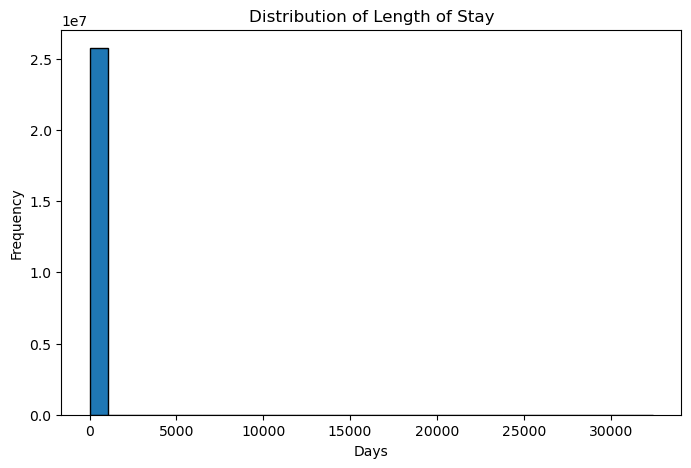

In [88]:
plt.figure(figsize=(8,5))
df['length of stay'].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribution of Length of Stay")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

In [89]:
# Filtering the dataframe to include rows with length of stay less or equal than 30 days
df_LOS_hist = df['length of stay'][df['length of stay'] <= 30]

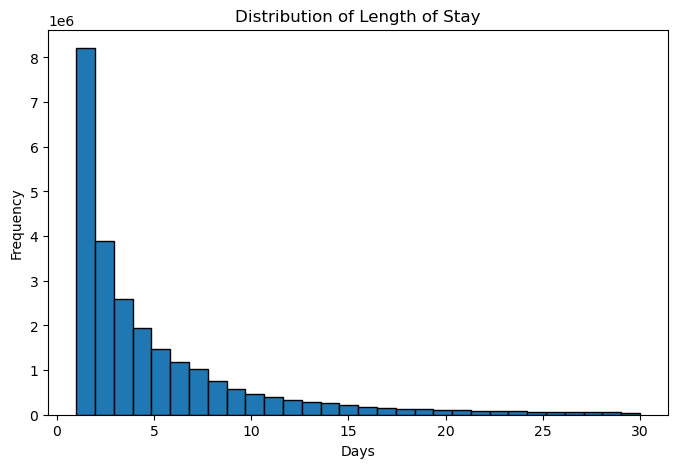

In [90]:
plt.figure(figsize=(8,5))
df_LOS_hist.plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribution of Length of Stay")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

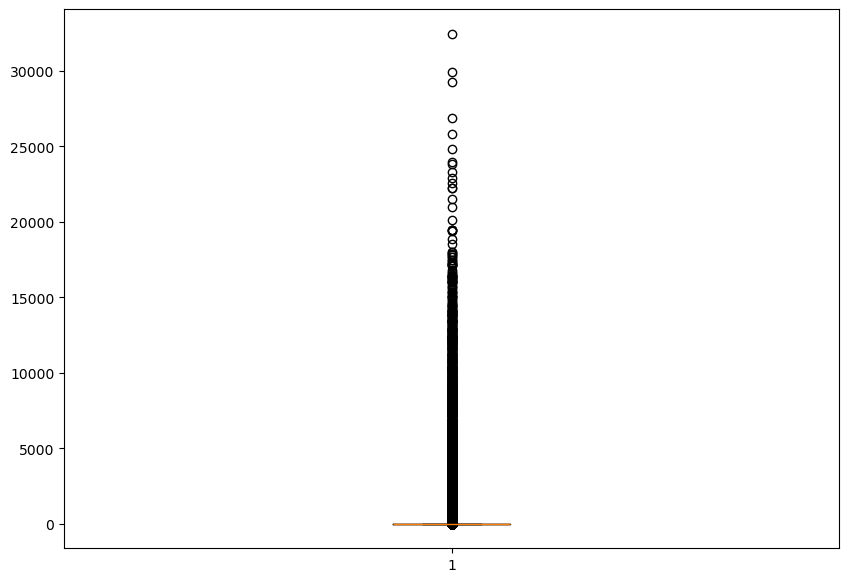

In [91]:
# The boxplot shows what is seen in the first histogram: the distribution is skewed and affected by really high extreme values
fig = plt.figure(figsize =(10, 7))

plt.boxplot(df["length of stay"])
plt.show()

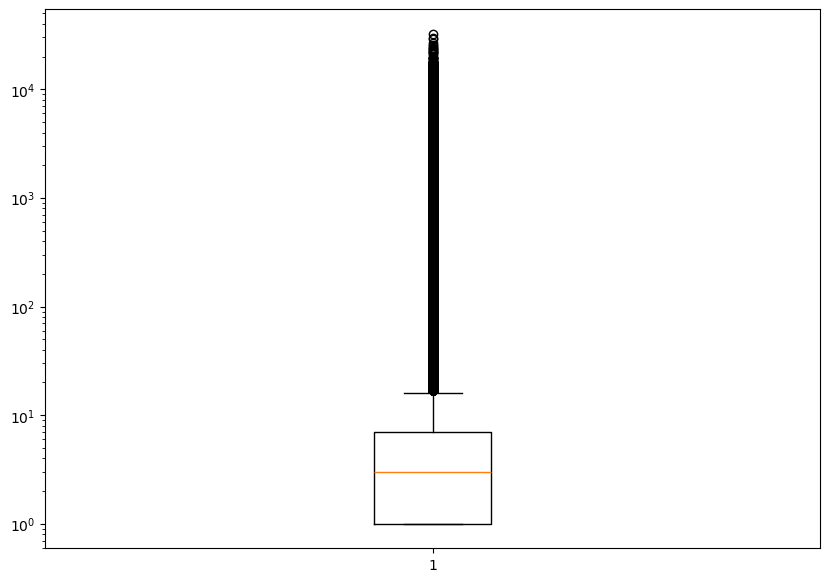

0.25     1.0
0.50     3.0
0.75     7.0
0.95    22.0
0.99    53.0
Name: length of stay, dtype: float64


In [92]:
# Applying logarithmic transformation helps to visualize the distribution clearer
fig = plt.figure(figsize =(10, 7))

plt.boxplot(df["length of stay"])
plt.yscale('log')
plt.show()

# Quantiles
print(df['length of stay'].quantile([0.25, 0.5, 0.75, 0.95, 0.99]))

In [93]:
# Filtering length of stay to just consider disharges of 22 days (percentile 95) or shorter to create a boxplot 
df_LOS_box = df['length of stay'][df['length of stay'] <= 22]

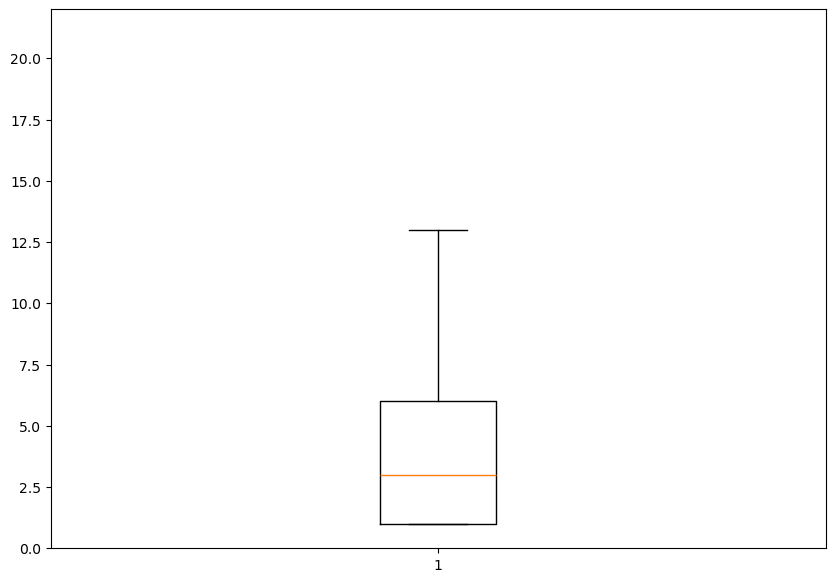

In [94]:
# 22 days or less of length of stay includes all the discharges that are in the 95 percentile or below, so the 5% with longest stays are excluded.
fig = plt.figure(figsize =(10, 7))

plt.boxplot(df_LOS_box, showfliers=False)
plt.ylim(0,22)
plt.show()

# 3. Outliers analysis

In [96]:
# Creating limits to separate outliers from the rest of the data
limit_99 = df['length of stay'].quantile(0.99)
limit_95 = df['length of stay'].quantile(0.95)

In [97]:
print("Amount of discharges whose length of stay is over percentile 99 (53 days): ",len(df['length of stay'][df['length of stay'] > limit_99]))

Amount of discharges whose length of stay is over percentile 99 (53 days):  256528


In [98]:
print("Amount of discharges whose length of stay is over percentile 95 (22 days): ",len(df['length of stay'][df['length of stay'] > limit_95]))

Amount of discharges whose length of stay is over percentile 95 (22 days):  1229838


In [99]:
# Drop missing values
los = df['length of stay'].dropna()

# Compute quartiles
Q1 = los.quantile(0.25)
Q3 = los.quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")


Q1: 1.0, Q3: 7.0, IQR: 6.0


In [100]:
# Lower and upper thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 3 * IQR

print(f"Lower threshold: {lower_threshold}")
print(f"Upper threshold: {upper_threshold}")


Lower threshold: -8.0
Upper threshold: 25.0


In [101]:
outliers = los[(los < lower_threshold) | (los > upper_threshold)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 1011147


In [102]:
pct_outliers = len(outliers) / len(los) * 100
print(f"Percentage of outliers: {pct_outliers:.2f}%")


Percentage of outliers: 3.93%


# Decision about outliers 

In [104]:
# Create a dataframe only with outliers
outliers = df[df["length of stay"] > upper_threshold]

In [105]:
# Counts of outliers per column. This is useful to know what are the characterstics of the outliers apart of length of stay.
for col in outliers.columns:
    print(outliers[col].value_counts())

sex
Male      596543
Female    414604
Name: count, dtype: int64
age
60-69     180248
70-79     170926
50-59     141667
0-1       106327
80-120    106323
40-49      98570
30-39      71972
20-29      60969
10-19      47622
1-9        26523
Name: count, dtype: int64
health insurance
Fonasa    938609
Isapre     72538
Name: count, dtype: int64
healthcare facility type
Public     838012
Private    120366
Unknown     52769
Name: count, dtype: int64
healthcare facility name
Unknown                                                                 219698
Hospital Barros Luco Trudeau (Santiago, San Miguel)                      34281
Hospital Clínico Regional Dr. Guillermo Grant Benavente (Concepción)     30106
Hospital Dr. Hernán Henríquez Aravena (Temuco)                           26543
Complejo Hospitalario Dr. Sótero del Río (Santiago, Puente Alto)         26198
                                                                         ...  
Consultorio Mutual de Seguridad CChC (Chillán)         

In [106]:
# Top 15 diagnoses with long stays
outliers["primary diagnosis name"].value_counts().head(15)

primary diagnosis name
neumonia, no especificada                                                                20196
covid-19, virus identificado                                                             19515
otros recien nacidos pretermino                                                          17420
fractura del cuello del femur                                                            16201
diabetes mellitus no especificada, con complicaciones circulatorias perifericas          16006
septicemia, no especificada                                                              13086
esquizofrenia paranoide                                                                  12305
esquizofrenia, no especificada                                                           11968
enfermedad renal cronica, no especificada                                                11491
diabetes mellitus no insulinodependiente con complicaciones circulatorias perifericas    10589
sindrome de dificultad resp

In [107]:
# Sample of outliers dataframe with the top 1000 longest stays
out_top1000 = outliers.sort_values(by="length of stay", ascending = False).head(1000)

In [108]:
out_top1000

,sex,age,health insurance,healthcare facility type,healthcare facility name,length of stay,discharge condition,primary diagnosis code,primary diagnosis name,year,first letter,two digits,chapter codes,chapter names
2182477,Male,80-120,Isapre,Private,Clínica del Trabajador de la AChS Ovalle,32452,Alive,I679,"enfermedad cerebrovascular, no especificada",2004,I,67,I00-I99,Enfermedades del sistema circulatorio
8239411,Female,80-120,Fonasa,Private,Clínica Psiquiatrica Raquel Gaete,29924,Deceased,F03X,"demencia, no especificada",2010,F,3,F00-F99,Trastornos mentales y del comportamiento
10567377,Female,70-79,Fonasa,Private,Clínica Psiquiatrica Raquel Gaete,29235,Deceased,J189,"neumonia, no especificada",2012,J,18,J00-J99,Enfermedades del sistema respiratorio
8991809,Female,80-120,Fonasa,Public,Instituto Psiquiátrico Dr. José Horwitz Barak ...,26855,Deceased,F209,"esquizofrenia, no especificada",2010,F,20,F00-F99,Trastornos mentales y del comportamiento
9966755,Female,70-79,Fonasa,Private,Clínica Psiquiatrica Raquel Gaete,25837,Deceased,I64X,"accidente vascular encefalico agudo, no especi...",2011,I,64,I00-I99,Enfermedades del sistema circulatorio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22255191,Male,30-39,Fonasa,Public,Unknown,3291,Alive,F203,esquizofrenia indiferenciada,2022,F,20,F00-F99,Trastornos mentales y del comportamiento
16692078,Male,60-69,Fonasa,Public,Hospital Psiquiátrico Dr. Philippe Pinel (Puta...,3291,Alive,F711,retraso mental moderado c/deterioro significat...,2017,F,71,F00-F99,Trastornos mentales y del comportamiento
7283174,Female,60-69,Fonasa,Private,Clínica Puerto Montt,3288,Alive,E149,"diabetes mellitus no especificada, sin mencion...",2009,E,14,E00-E90,"Enfermedades endocrinas, nutricionales y metab..."
12763849,Male,80-120,Fonasa,Public,"Hospital Psiquiátrico El Peral (Santiago, Puen...",3285,Alive,F209,"esquizofrenia, no especificada",2014,F,20,F00-F99,Trastornos mentales y del comportamiento


In [109]:
# The shortest discharge in the top 1000 was 3284 days long (around 9 years)
out_top1000["length of stay"].min()

3284

In [110]:
# Which diagnoses are more frequent among the top 1000 longest stays? Mental health problems
out_top1000["primary diagnosis name"].value_counts().head(30)

primary diagnosis name
esquizofrenia paranoide                                                                          150
esquizofrenia, no especificada                                                                   141
esquizofrenia residual                                                                            63
retraso mental moderado c/deterioro significat. del comportam., que requiere atenc. o tratam.     54
neumonia, no especificada                                                                         34
infarto agudo del miocardio, sin otra especificacion                                              28
retraso mental profundo c/deterioro significat. del comportam., que requiere atenc. o tratam.     26
retraso mental, no especificado, con deterioro del comportamiento de grado no especificado        22
esquizofrenia catatonica                                                                          20
retraso mental moderado con deterioro del comportamiento de grado no

In [111]:
# Which healthcare facilities have the longest stays? Are institutions dedicated to patients with mental health problems
out_top1000["healthcare facility name"].value_counts().head(30)

healthcare facility name
Hospital Psiquiátrico El Peral (Santiago, Puente Alto)                   227
Hospital Psiquiátrico Dr. Philippe Pinel (Putaendo)                      178
Instituto Psiquiátrico Dr. José Horwitz Barak (Santiago, Recoleta)       148
Clínica Psiquiatrica Raquel Gaete                                        114
Unknown                                                                  106
Clínica del Carmen                                                        84
Hospital Clínico de Magallanes Dr. Lautaro Navarro Avaria                 28
Clínica Santa Elena                                                       18
Clínica  Psiquiátrica Santa Cecilia                                       12
Hospital Comunitario de Salud Familiar de Quirihue                        11
Clínica San Miguel                                                         7
Centro de Rehabilitación Limache Capredena                                 5
Hospital Clorinda Avello (Santa Juana)             

In [112]:
# Filter medium-long stays that are higher than the upper threshold (outlier), but shorter than 1 year
mid_los = df[(df["length of stay"] > upper_threshold) & (df["length of stay"] <= 365)]

In [113]:
mid_los

,sex,age,health insurance,healthcare facility type,healthcare facility name,length of stay,discharge condition,primary diagnosis code,primary diagnosis name,year,first letter,two digits,chapter codes,chapter names
1,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",58,Deceased,E145,"diabetes mellitus no especificada, con complic...",2001,E,14,E00-E90,"Enfermedades endocrinas, nutricionales y metab..."
14,Male,40-49,Fonasa,Public,Instituto Nacional de Enfermedades Respiratori...,45,Deceased,J189,"neumonia, no especificada",2001,J,18,J00-J99,Enfermedades del sistema respiratorio
18,Male,0-1,Fonasa,Public,Hospital Dr. Ernesto Torres Galdames (Iquique),105,Deceased,P050,bajo peso para la edad gestacional,2001,P,5,P00-P96,Ciertas afecciones originadas en el período pe...
19,Male,0-1,Fonasa,Public,Hospital Dr. Ernesto Torres Galdames (Iquique),83,Deceased,A419,"septicemia, no especificada",2001,A,41,A00-B99,Ciertas enfermedades infecciosas y parasitarias
21,Male,70-79,Fonasa,Public,Hospital Dr. Juan Noé Crevanni (Arica),55,Deceased,E145,"diabetes mellitus no especificada, con complic...",2001,E,14,E00-E90,"Enfermedades endocrinas, nutricionales y metab..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25758630,Female,80-120,Isapre,Private,Unknown,30,Alive,A400,"septicemia debida a estreptococo, grupo a",2024,A,40,A00-B99,Ciertas enfermedades infecciosas y parasitarias
25758648,Female,0-1,Isapre,Private,Unknown,28,Alive,P284,otras apneas del recien nacido,2024,P,28,P00-P96,Ciertas afecciones originadas en el período pe...
25758649,Female,0-1,Isapre,Private,Unknown,28,Alive,P229,"dificultad respiratoria del recien nacido, no ...",2024,P,22,P00-P96,Ciertas afecciones originadas en el período pe...
25758650,Female,0-1,Isapre,Private,Unknown,38,Alive,P220,sindrome de dificultad respiratoria del recien...,2024,P,22,P00-P96,Ciertas afecciones originadas en el período pe...


In [114]:
# See how are these stays in relation to other columns
for col in mid_los.columns:
    print(mid_los[col].value_counts())

sex
Male      590739
Female    411564
Name: count, dtype: int64
age
60-69     179105
70-79     170036
50-59     140430
80-120    105623
0-1       105498
40-49      97345
30-39      70963
20-29      60216
10-19      47371
1-9        25716
Name: count, dtype: int64
health insurance
Fonasa    930233
Isapre     72070
Name: count, dtype: int64
healthcare facility type
Public     831823
Private    118221
Unknown     52259
Name: count, dtype: int64
healthcare facility name
Unknown                                                                 217744
Hospital Barros Luco Trudeau (Santiago, San Miguel)                      34243
Hospital Clínico Regional Dr. Guillermo Grant Benavente (Concepción)     29974
Hospital Dr. Hernán Henríquez Aravena (Temuco)                           26513
Complejo Hospitalario Dr. Sótero del Río (Santiago, Puente Alto)         26143
                                                                         ...  
Clínica  San José                                      

In [115]:
# The most frequent diagnoses are different than with really long stays.
# Now neumonia is the most frequent, followed by COVID, some chronic diseases (ex. diabetes and complications) tumors and others
mid_los["primary diagnosis name"].value_counts().head(15)

primary diagnosis name
neumonia, no especificada                                                                20067
covid-19, virus identificado                                                             19476
otros recien nacidos pretermino                                                          17412
fractura del cuello del femur                                                            16184
diabetes mellitus no especificada, con complicaciones circulatorias perifericas          15995
septicemia, no especificada                                                              13018
esquizofrenia paranoide                                                                  11526
enfermedad renal cronica, no especificada                                                11461
esquizofrenia, no especificada                                                           11381
diabetes mellitus no insulinodependiente con complicaciones circulatorias perifericas    10582
sindrome de dificultad resp

In [116]:
# Top 1000 longest medium-long stays
mid_los_top1000 = mid_los.sort_values(by="length of stay", ascending = False).head(1000)

In [117]:
mid_los_top1000

,sex,age,health insurance,healthcare facility type,healthcare facility name,length of stay,discharge condition,primary diagnosis code,primary diagnosis name,year,first letter,two digits,chapter codes,chapter names
668276,Female,60-69,Fonasa,Public,Complejo Hospitalario Dr. Sótero del Río (Sant...,365,Alive,Z019,examen especial no especificado,2002,Z,1,Z00-Z99,Factores que influyen en el estado de salud y ...
510192,Male,1-9,Isapre,Private,Centro CONIN Concepción,365,Alive,E639,"deficiencia nutricional, no especificada",2002,E,63,E00-E90,"Enfermedades endocrinas, nutricionales y metab..."
14493304,Female,40-49,Fonasa,Public,Complejo Hospitalario Dr. Sótero del Río (Sant...,365,Alive,T844,complic.mecanica de otros dispositivos protesi...,2015,T,84,S00-T98,"Traumatismos, envenenamientos y algunas otras ..."
7926846,Male,1-9,Fonasa,Private,Clínica Universitaria de Puerto Montt S.A.,365,Alive,S420,fractura de la clavicula,2009,S,42,S00-T98,"Traumatismos, envenenamientos y algunas otras ..."
879632,Male,10-19,Fonasa,Public,Hospital Santa Elisa (Mariquina) (D),365,Alive,F238,otros trastornos psicoticos agudos y transitorios,2002,F,23,F00-F99,Trastornos mentales y del comportamiento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18587403,Male,30-39,Fonasa,Public,Hospital Clínico Regional Dr. Guillermo Grant ...,339,Alive,A419,"septicemia, no especificada",2019,A,41,A00-B99,Ciertas enfermedades infecciosas y parasitarias
14318084,Male,50-59,Isapre,Private,Hospital Clínico Viña del Mar,339,Alive,G931,"lesion cerebral anoxica, no clasificada en otr...",2015,G,93,G00-G99,Enfermedades del sistema nervioso central
19730943,Female,60-69,Fonasa,Public,Hospital Carlos Van Buren (Valparaíso),339,Alive,I619,"hemorragia intraencefalica, no especificada",2020,I,61,I00-I99,Enfermedades del sistema circulatorio
15693092,Male,30-39,Fonasa,Public,Hospital San José de Maipo,339,Alive,Z549,convalecencia consecutiva a tratamiento no esp...,2016,Z,54,Z00-Z99,Factores que influyen en el estado de salud y ...


In [118]:
# The longest medium-long stays diagnoses are related to mental and nutrition issues (often realted to mental health disorders)
mid_los_top1000["primary diagnosis name"].value_counts().head(30)

primary diagnosis name
desnutricion proteicocalorica no especificada                                                    72
desnutricion proteicocalorica leve                                                               67
esquizofrenia paranoide                                                                          67
esquizofrenia, no especificada                                                                   46
desnutricion proteicocalorica moderada                                                           20
retraso mental moderado c/deterioro significat. del comportam., que requiere atenc. o tratam.    20
esquizofrenia hebefrenica                                                                        17
esquizofrenia indiferenciada                                                                     15
problema no especificado relacionado con el ambiente social                                      14
demencia, no especificada                                                    

In [119]:
# Most frequent facilities are related to mental health issues again, nut there is more presence of other hospitals. Unkown values are from 2021 to 2024.
mid_los_top1000["healthcare facility name"].value_counts().head(30)

healthcare facility name
Unknown                                                                  202
Hospital Psiquiátrico Dr. Philippe Pinel (Putaendo)                      105
Instituto Psiquiátrico Dr. José Horwitz Barak (Santiago, Recoleta)        59
Centro CONIN Valdivia                                                     41
Hospital San José de Maipo                                                35
Centro CONIN Credes                                                       29
Hospital Del Salvador (Valparaíso)                                        23
Centro Nutricional CONIN de Viña del Mar                                  21
Hospital Clínico Regional Dr. Guillermo Grant Benavente (Concepción)      20
Centro Nutricional CONIN de San Antonio                                   17
Centro CONIN Temuco                                                       17
Centro de Enfermedades Respiratorias Infantiles Josefina Martínez (D)     16
Hospital Dr. Leonardo Guzmán (Antofagasta)         

# Capping (winsorize) outliers

In [122]:
# Compare central tendency measures with and without outliers
mean_original = los.mean()
median_original = los.median()
mean_wo_outliers = los[(los >= lower_threshold) & (los <= upper_threshold)].mean()
median_wo_outliers = los[(los >= lower_threshold) & (los <= upper_threshold)].median()


# Median is the same, showing more reliability on this measure and mean is distorted by extreme values
# upper threshold is more flexible (higher) due to expansion in the IQR formula, changing the multiplier, which commonly is 1.5 for 3.
print("Mean with outliers:", mean_original)
print("Median with outliers:", median_original)
print("Mean without outliers:", mean_wo_outliers)
print("Median without outliers:", median_wo_outliers)

Mean with outliers: 6.756565392695241
Median with outliers: 3.0
Mean without outliers: 4.4637734076290405
Median without outliers: 3.0


In [123]:
# Checking percentiles in the really high section
print(df['length of stay'].quantile([0.95, 0.99, 0.995, 0.999]))

0.950     22.0
0.990     53.0
0.995     75.0
0.999    176.0
Name: length of stay, dtype: float64


In [124]:
# Number of values capped choosing the percentile 99.9 as the limit
# 25.565 outliers higher than 176 days are capped
capped_count = (df['length of stay'] > 176).sum()
print(capped_count, "values are capped")

25565 values are capped


In [125]:
# Vectorization to create a length of stay column with capped values
df['LOS_capped'] = np.minimum(df['length of stay'], 176)

In [126]:
# Checking values are capped
df['LOS_capped'].max()

176

In [127]:
# No NaNs after vectorization
df.isna().sum()

sex                         0
age                         0
health insurance            0
healthcare facility type    0
healthcare facility name    0
length of stay              0
discharge condition         0
primary diagnosis code      0
primary diagnosis name      0
year                        0
first letter                0
two digits                  0
chapter codes               0
chapter names               0
LOS_capped                  0
dtype: int64

# Plot side by side distribution of length of stay with outliers and capped values

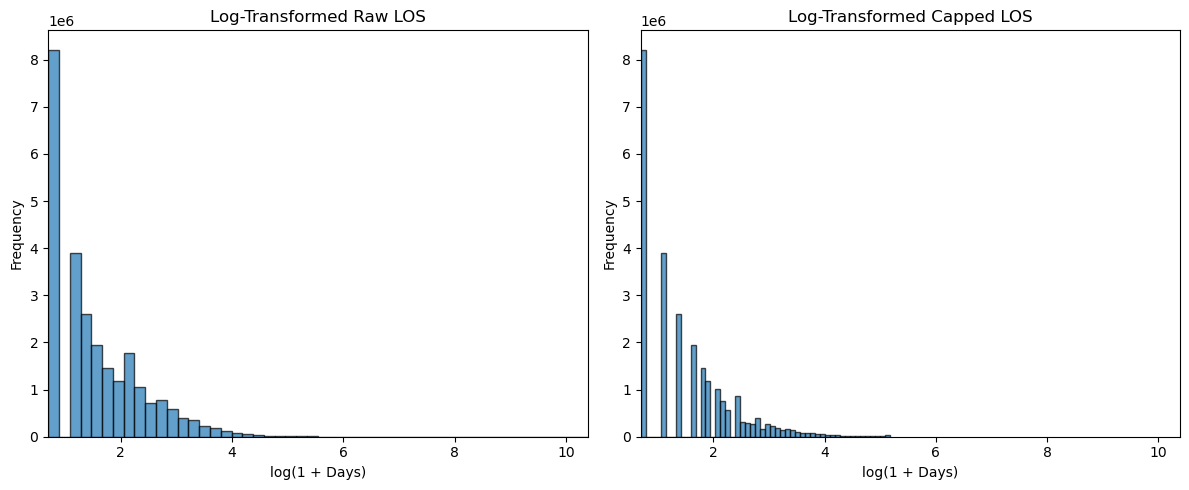

In [128]:

# Apply log1p transform (handles zeros safely)
log_raw = np.log1p(df['length of stay'])
log_capped = np.log1p(df['LOS_capped'])

plt.figure(figsize=(12,5))

# Plot histograms side by side
ax1 = plt.subplot(1,2,1)
ax1.hist(log_raw, bins=50, alpha=0.7, edgecolor='black')
ax1.set_title("Log-Transformed Raw LOS")
ax1.set_xlabel("log(1 + Days)")
ax1.set_ylabel("Frequency")

ax2 = plt.subplot(1,2,2)
ax2.hist(log_capped, bins=50, alpha=0.7, edgecolor='black')
ax2.set_title("Log-Transformed Capped LOS")
ax2.set_xlabel("log(1 + Days)")
ax2.set_ylabel("Frequency")

# Synchronize axes for comparability
x_min = min(log_raw.min(), log_capped.min())
x_max = max(log_raw.max(), log_capped.max())
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

plt.tight_layout()
plt.show()



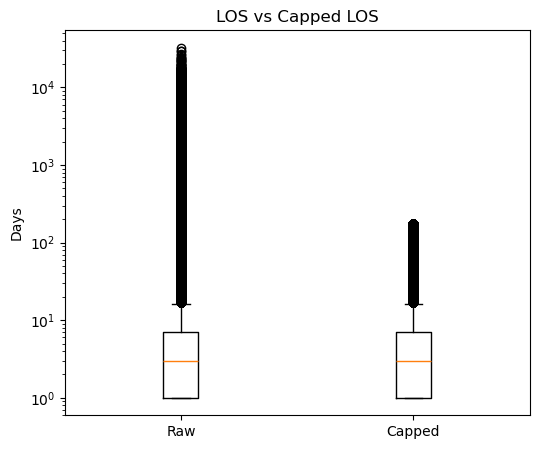

In [129]:
plt.figure(figsize=(6,5))
plt.boxplot([df['length of stay'], df['LOS_capped']], labels=['Raw', 'Capped'])
plt.title("LOS vs Capped LOS")
plt.ylabel("Days")
plt.yscale("log")  # log scale to handle skew
plt.show()


# Guiding Questions

# Visualizations

# Questions

# Insights

# Ideas or considerations for future analysis